## Setup
---

In [17]:
%matplotlib inline

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [19]:
def visualize(figsize=(15, 15),**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=figsize)
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

In [20]:
def overlay_comparison(pred, gt):
    pred_arr = np.asarray(pred)
    gt_arr = np.asarray(gt)

    binary_xor = cv2.bitwise_xor(pred_arr, gt_arr)
    return Image.fromarray(binary_xor)

In [21]:
def save_results(original_imgs, activations, detections, gt_imgs):   
    for i in range(len(original_imgs)):
            activations[i].save(f'Results/activations/{i+1}.jpg')
            detections[i].save(f'Results/detections/{i+1}.jpg')
            original_imgs[i].save(f'Results/original/{i+1}.jpg')
            gt_imgs[i].save(f'Results/cropped_gt/{i+1}.jpg')

In [22]:
SEGMENTATION_IMG_DIR = '../Output/segmentation'
GT_IMG_DIR = '../CellsDataset/ground_truth'
ORIGINAL_IMG_DIR = '../CellsDataset/original'

def get_results():
    segmentation_imgs = []
    gt_imgs = []
    original_imgs = []
    for i in range(1, 11):
        segmentation_imgs.append(Image.open(SEGMENTATION_IMG_DIR + f'/{i}.png'))
        gt_imgs.append(Image.open(GT_IMG_DIR + f'/{i}.png').convert('L'))
        original_imgs.append(Image.open(ORIGINAL_IMG_DIR + f'/{i}.jpg'))
    return segmentation_imgs, gt_imgs, original_imgs
    

In [23]:
def calculate_iou(image1, image2):
    intersection = np.logical_and(image1, image2)
    union = np.logical_or(image1, image2)
    iou = np.sum(intersection) / np.sum(union)
    return iou

## Visualization
---

Obtaining the results

In [24]:
segmentation_imgs, gt_imgs, original_imgs = get_results()

Qualitative comparison between the obtained segmentation and the ground truth.

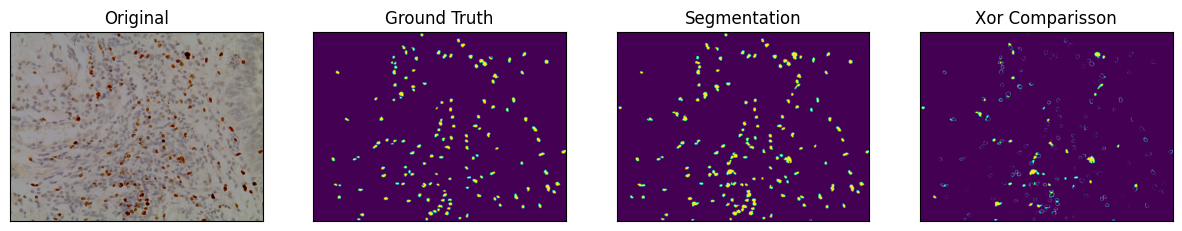

IOU for image 1.jpg: 0.6708092355973997


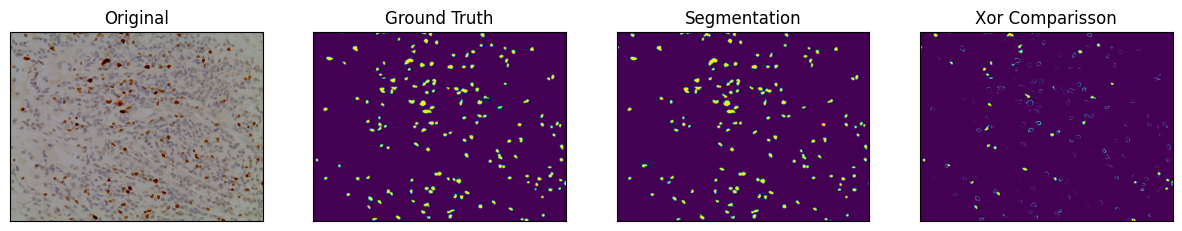

IOU for image 2.jpg: 0.7478443798046956


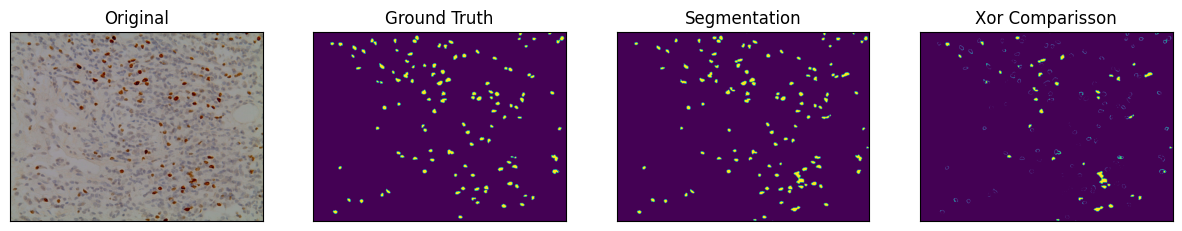

IOU for image 3.jpg: 0.6568833984414947


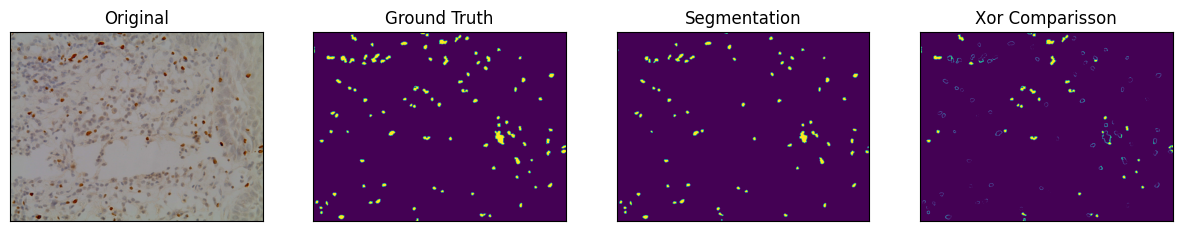

IOU for image 4.jpg: 0.5762572030563806


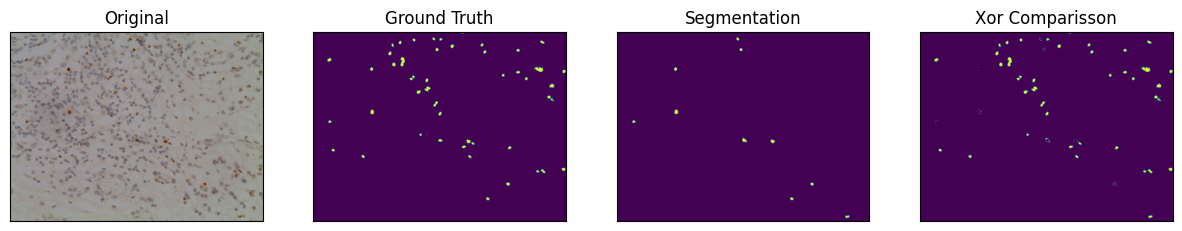

IOU for image 5.jpg: 0.16729329913208477


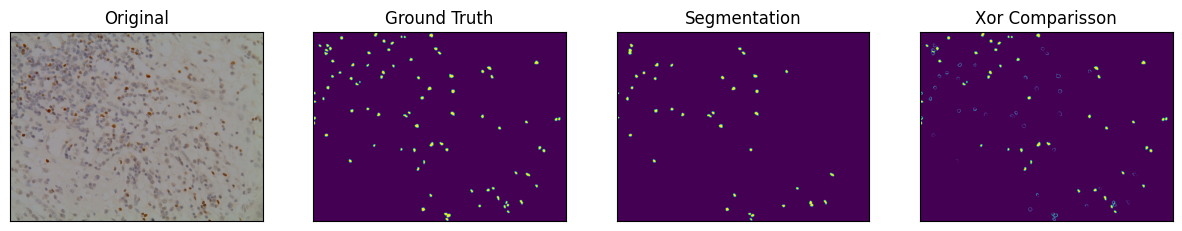

IOU for image 6.jpg: 0.40679537781159353


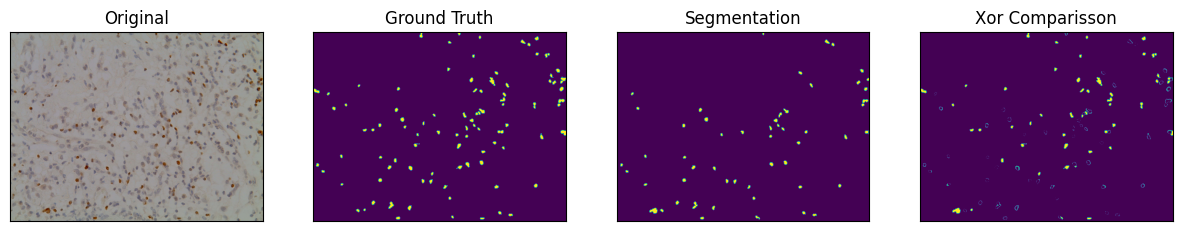

IOU for image 7.jpg: 0.4613137727891826


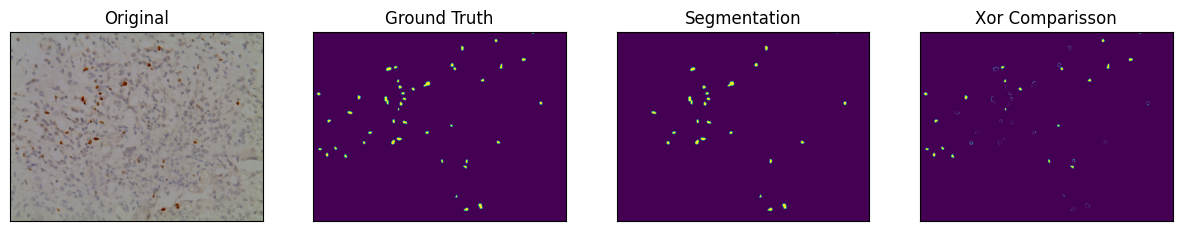

IOU for image 8.jpg: 0.5874417261438178


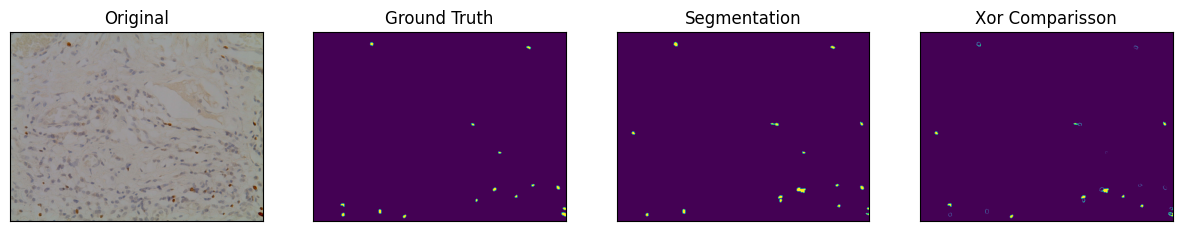

IOU for image 9.jpg: 0.4395091053048298


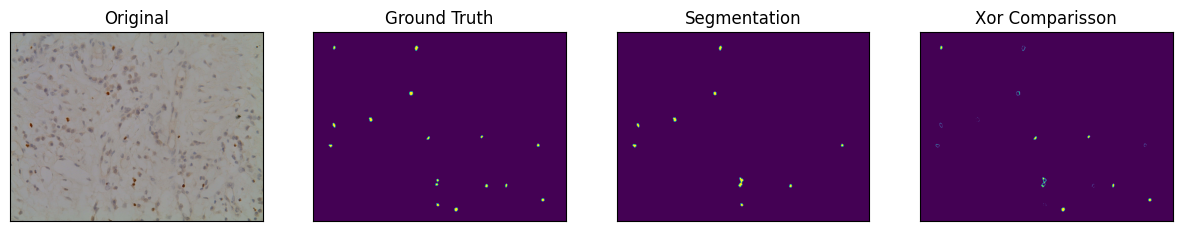

IOU for image 10.jpg: 0.5296270876229696


In [25]:
for i in range(0, 10):
    xor_overlap = overlay_comparison(segmentation_imgs[i], gt_imgs[i])
    visualize(original = original_imgs[i], ground_truth = gt_imgs[i], segmentation = segmentation_imgs[i], xor_comparisson = xor_overlap)
    iou = calculate_iou(segmentation_imgs[i], gt_imgs[i])
    print(f'IOU for image {i + 1}.jpg: {iou}')